In [6]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [7]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [8]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [9]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [10]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [11]:
print(len(classNameslabels))

2


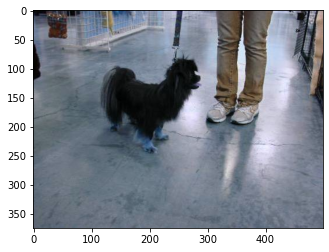

In [12]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [13]:
print(imageData.shape)

(375, 499, 3)


In [14]:
image_shape = (128, 128)

In [15]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [16]:
#datasetLoaderFromDirectory()

In [17]:
#(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

In [18]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

  0%|          | 0/4000 [00:00<?, ?it/s]

Counting : dataset/training_set/


100%|██████████| 4000/4000 [00:34<00:00, 115.68it/s]


Counting : dataset/test_set/


100%|██████████| 1000/1000 [00:11<00:00, 85.09it/s]


In [19]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [20]:
#help(shuffle)

In [21]:
train_labels[5]

0.0

In [22]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [23]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


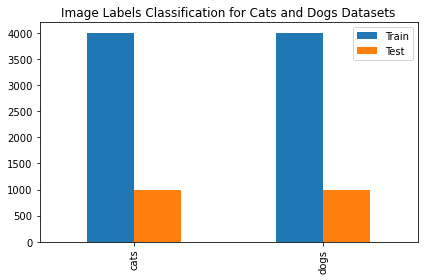

In [24]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Home Work: Create a Pie chart using above concept

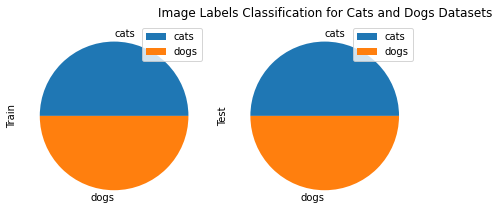

In [26]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.pie(subplots=True)
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

In [27]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))

256

In [28]:
# Scaleing image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [29]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

256

In [30]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 128, 128, 3)

In [31]:
#train_labels[345]

In [32]:
# Now Read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+classNames[int(imagelabel[index])])
    plt.show()

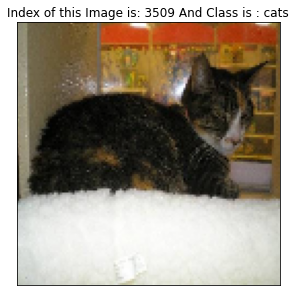

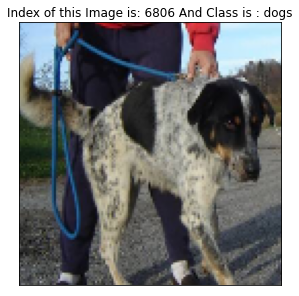

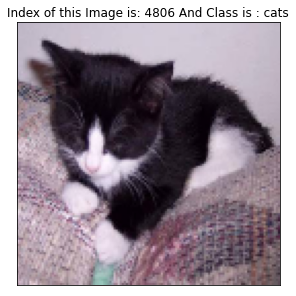

In [33]:
# Home Work: + and Actual is Class Names

for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [34]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

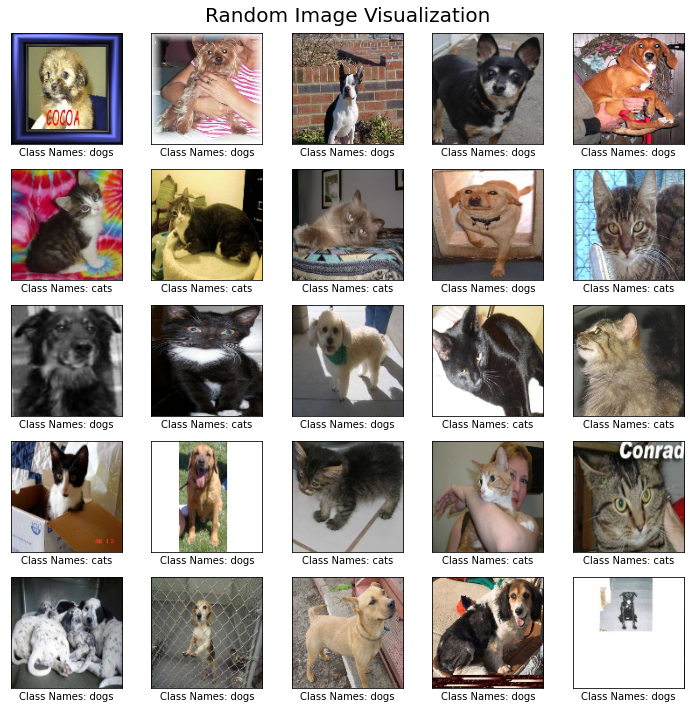

In [35]:
ImageVisualization2(classNames, train_images, train_labels)

In [36]:
train_images.shape

(8000, 128, 128, 3)

In [37]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

In [38]:
# model = Sequential()


# #Input Layer
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (224,224, 3)))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# #(224/2, 224/2) -- > (112, 112)
 #100

# #2nd Layer
# model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128,kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 100 + 40
# #3rd Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #4th Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# #5th Layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #6th layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# model.add(Flatten())


# #Output Layer
# model.add(Dense(256, activation = "relu")) 
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(2, activation = "softmax"))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [40]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [41]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 3,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/3
50/50 [==============================] - 118s 2s/step - loss: 0.6921 - accuracy: 0.5450 - val_loss: 0.6759 - val_accuracy: 0.5537
Epoch 2/3
50/50 [==============================] - 115s 2s/step - loss: 0.6372 - accuracy: 0.6452 - val_loss: 0.6311 - val_accuracy: 0.6406
Epoch 3/3
50/50 [==============================] - 123s 2s/step - loss: 0.5839 - accuracy: 0.6934 - val_loss: 0.5574 - val_accuracy: 0.7100


In [68]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

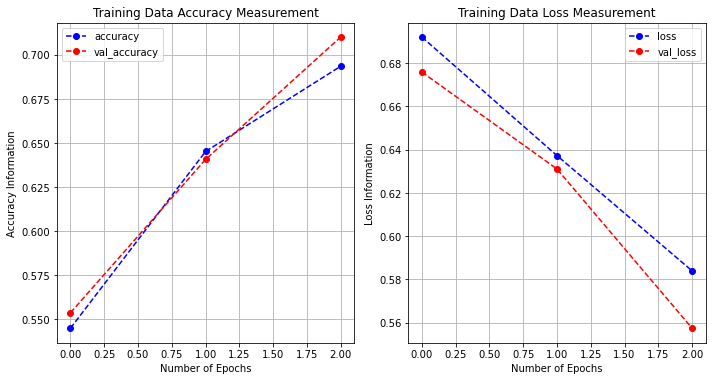

In [69]:
accuracy_and_loss_Plot(modelData)

In [37]:
testLoss = model.evaluate(test_image, test_labels)

63/63 [==============================] - 7s 110ms/step - loss: 0.6107 - accuracy: 0.6640


63/63 [==============================] - 6s 98ms/step


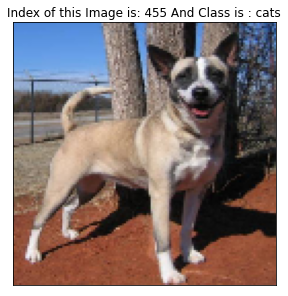

In [38]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_image, predictedDataLabels)

In [39]:
# # Home Work: + and Actual is Class Names
# for i in range(1, 10):
#     ImageVisualization(classNames, test_image, predictedDataLabels)

In [40]:
# def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
#     result = (ImageLabels == predictedDataLabels)
#     #print(result)
#     missClass = np.where(result == 0)
#     #print(int(missClass))
    
#     missClassImage = imageData[missClass]
#     missClasslabels = predictedDataLabels[missClass]
    
#     print("Miss Classification Image Data is: ")
#     ImageVisualization2(classNames, missClassImage, missClasslabels)

In [41]:
def missClassification(class_names, test_images, test_labels, pred_labels):
    result = (test_labels == pred_labels)
    missClass = np.where(result == 0)
    missClassImage = test_images[missClass]
    missClasslabels = pred_labels[missClass]

    title = "Some examples of mislabeled images by the classifier:"
    ImageVisualization2(class_names,  missClassImage, missClasslabels)

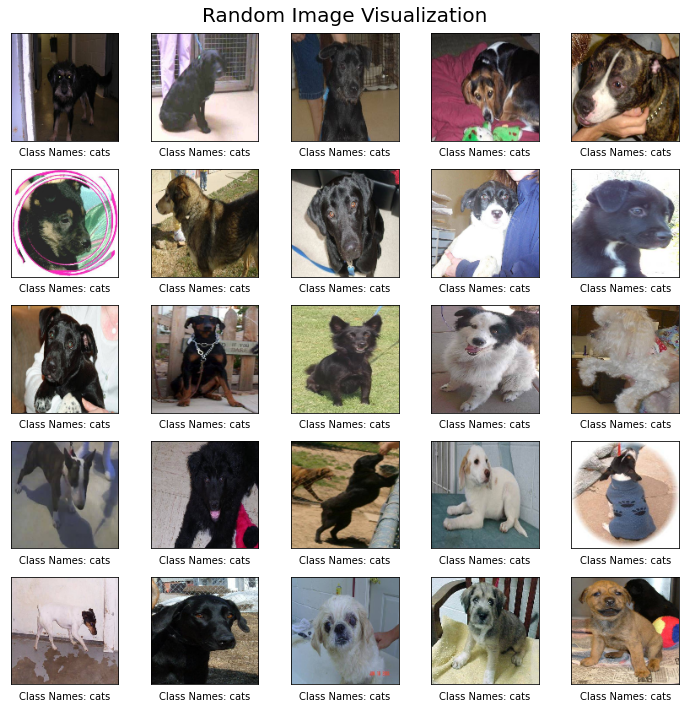

In [42]:
missClassification(classNames, test_image, test_labels, predictedDataLabels)

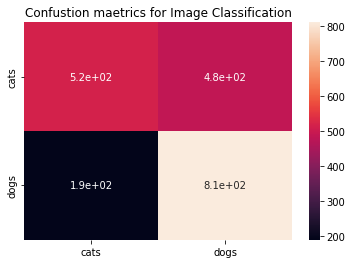

In [43]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()

In [44]:
# 1. TP
# 2. TN
# 3. FP
# 4. FN


# 1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
# 2. MissClassification  = (FP + FN) / (TP + TN + FP + FN)

<h3><center> VGG Implementation </center></h3>

<h4><center> Home work </center></h4>
1. Filters Starts from 32

2. padding = "valid"
3. input_shape = (128, 128, 3)
4. MaxPooling2D = (3, 3)
5. Strides = 4
6. in 5th & 6th Layer total Conv2D = 4
7. Kernel size = 11, 11

In [54]:
model = Sequential()


#Input Layer
model.add(Conv2D(filters = 32, kernel_size = (11, 11), padding = "valid", activation = "relu", input_shape = (128,128, 3)))
model.add(Conv2D(filters = 32, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))



#2nd Layer
model.add(Conv2D(filters = 64, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))


#3rd Layer
model.add(Conv2D(filters = 64, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))


#4th Layer
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))




#5th Layer
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))


#6th layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (4, 4)))


model.add(Flatten())


#Output Layer
model.add(Dense(128, activation = "relu")) 
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_72. Consider increasing the input size. Received input shape [None, 7, 7, 64] which would produce output shape with a zero or negative value in a dimension.

In [45]:
# model = Sequential()


# #Input Layer
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (224,224, 3)))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# #(224/2, 224/2) -- > (112, 112)
 #100

# #2nd Layer
# model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128,kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 100 + 40
# #3rd Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #4th Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# #5th Layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #6th layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# model.add(Flatten())


# #Output Layer
# model.add(Dense(256, activation = "relu")) 
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(2, activation = "softmax"))

In [46]:
#model.summary()

In [55]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

In [56]:
model = VGG16(weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 102s 2us/step


In [57]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [58]:
trainingfeatureData = model.predict(train_images)

250/250 [==============================] - 475s 2s/step


In [59]:
testingfeatureData = model.predict(test_image)

63/63 [==============================] - 120s 2s/step


In [60]:
train_images.shape 

(8000, 128, 128, 3)

In [61]:
numberOfIamge, ImageW, ImageH, ch = train_images.shape

In [62]:
numberF =  ImageW * ImageH * ch

In [63]:
connectedModel = Sequential()

connectedModel.add(Flatten(input_shape = (ImageW, ImageH, ch)))
connectedModel.add(Dense(32, activation = "relu"))
connectedModel.add(Dense(2, activation = "softmax"))

In [64]:
connectedModel.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                1572896   
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,572,962
Trainable params: 1,572,962
Non-trainable params: 0
_________________________________________________________________


In [65]:
connectedModel.compile(optimizer = "adam", 
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["accuracy"])

In [66]:
connnectedModelHistory = connectedModel.fit(train_images, train_labels, batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
50/50 [==============================] - 2s 32ms/step - loss: 2.3347 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 2/10
50/50 [==============================] - 2s 31ms/step - loss: 0.6933 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 3/10
50/50 [==============================] - 3s 65ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 4/10
50/50 [==============================] - 4s 74ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 5/10
50/50 [==============================] - 3s 59ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 6/10
50/50 [==============================] - 3s 53ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 7/10
50/50 [==============================] - 3s 53ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 8/10
50

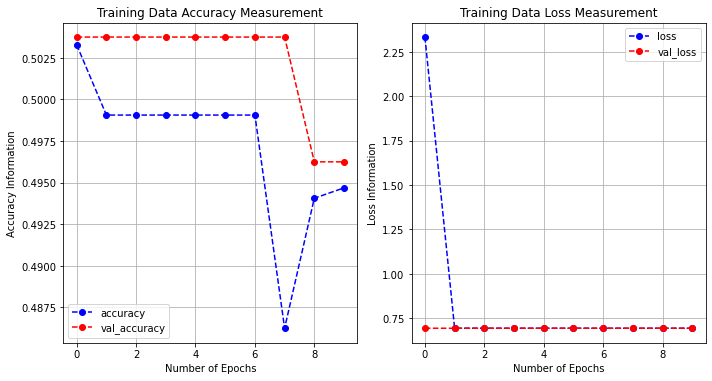

In [70]:
accuracy_and_loss_Plot(connnectedModelHistory)

In [71]:
connectedModel.evaluate(test_image, test_labels)

63/63 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473016738892, 0.5]

In [72]:
from tensorflow.keras import Model, Input

In [73]:
model = VGG16(weights = "imagenet", include_top = False)
model = Model(inputs = model.inputs, outputs = model.layers[-5].output)

In [74]:
trainDataF = model.predict(train_images)
testDataF = model.predict(test_image)

63/63 [==============================] - 97s 2s/step


In [64]:
inputShape = model.layers[-4].get_input_shape_at(0)
layer_input= Input(shape = (8, 8, 512))

In [65]:
layerData = layer_input

for i in model.layers[-4::1]:
    layerData = i(layerData)

In [66]:
layerData = Conv2D(64, (3, 3), activation = "relu")(layerData) #10
layerData = MaxPooling2D((2, 2))(layerData)# *10
layerData = Flatten()(layerData)

layerData = Dense(100, activation = "relu")(layerData)
layerData = Dense(2, activation = "softmax")(layerData)

In [67]:
finalModel = Model(layer_input, layerData)

In [68]:
finalModel

In [69]:
finalModel.compile(optimizer = "adam", 
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["accuracy"])

In [70]:
finalModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8, 8, 512)]       0         
                                                                 
 block4_conv1 (Conv2D)       multiple                  1180160   
                                                                 
 block4_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block4_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block4_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)         0   

In [71]:
finalModel.fit(trainDataF, train_labels, batch_size=128, validation_split=0.2)

ValueError: in user code:

    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/ds/lib/python3.7/site-packages/keras/engine/input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "model_1" (type Functional).
    
    Input 0 of layer "block4_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 256, but received input with shape (128, 8, 8, 512)
    
    Call arguments received by layer "model_1" (type Functional):
      • inputs=tf.Tensor(shape=(128, 8, 8, 512), dtype=float32)
      • training=True
      • mask=None
